# Web Scraping: A Key Tool in Data Science

## Web Scraping with Python

In [1]:
#   1. BeautifulSoup
from bs4 import BeautifulSoup
import requests

URL = "http://www.example.com"
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')
# print(soup)

#   2. Scrapy
import scrapy
class QuotesSpider(scrapy.Spider):
    name = 'quotes'
    start_url = ['http://quotes.toscrape.com/tag/humor/',]
    def parse(self, response):
        for quote in response.css('div.quote'):
            yield {'quote': quote.css('span.text::text').get()}

#   3. Selenium
from selenium import webdriver
driver = webdriver.Edge()
driver.get('http://www.example.com')

## Applications of Web Scraping
1. **Price Comparison:** collect data from online shopping web. to compare the prices of products.
2. **Email address gathering:** use web scraping to collect data email ID and then send bulk emails.
3. **Social Media Scraping:** collect data from Social Media webs. to find out what's trending.

# HTML for Web Scraping

**Example:**
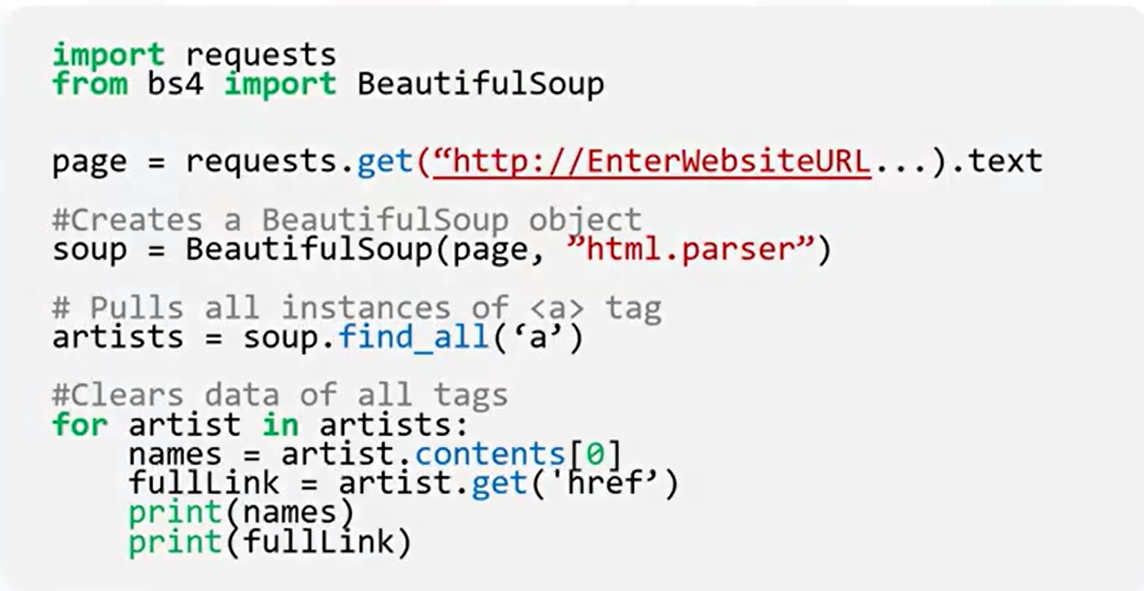

# Lab: Intro to Web Scraping Using BeautifulSoup

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
from bs4 import BeautifulSoup
import requests

## Beautiful Soup Object

In [4]:
%%html
<!DOCTYPE html>
<html>
<head>
<title>Page Title</title>
</head>
<body>
<h3><b id='boldest'>Lebron James</b></h3>
<p> Salary: $ 92,000,000 </p>
<h3> Stephen Curry</h3>
<p> Salary: $85,000, 000 </p>
<h3> Kevin Durant </h3>
<p> Salary: $73,200, 000</p>
</body>
</html>

In [5]:
# WWe can store it as a string in the variable HTML:
html="<!DOCTYPE html><html><head><title>Page Title</title></head><body><h3><b id='boldest'>Lebron James</b></h3><p> Salary: $ 92,000,000 </p><h3> Stephen Curry</h3><p> Salary: $85,000, 000 </p><h3> Kevin Durant </h3><p> Salary: $73,200, 000</p></body></html>"

In [6]:
# Parse a document
soup = BeautifulSoup(html, 'html.parser')

# Use prettify() to display HTML in the nested structure:
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   Page Title
  </title>
 </head>
 <body>
  <h3>
   <b id="boldest">
    Lebron James
   </b>
  </h3>
  <p>
   Salary: $ 92,000,000
  </p>
  <h3>
   Stephen Curry
  </h3>
  <p>
   Salary: $85,000, 000
  </p>
  <h3>
   Kevin Durant
  </h3>
  <p>
   Salary: $73,200, 000
  </p>
 </body>
</html>



## Tag

In [7]:
tag_object = soup.title
print('tag object:', tag_object)

tag object: <title>Page Title</title>


In [8]:
# We can see the tage type bs4.element.Tag:
print('tag object type:', type(tag_object))

tag object type: <class 'bs4.element.Tag'>


In [9]:
# If more than one Tag with the same name, the 1st is called:
tag_object = soup.h3
print(tag_object)

<h3><b id="boldest">Lebron James</b></h3>


## Children, Parents, and Siblings

In [10]:
tag_child = tag_object.b 
tag_child

<b id="boldest">Lebron James</b>

In [11]:
# Access tag parent
parent_tag = tag_child.parent
parent_tag

<h3><b id="boldest">Lebron James</b></h3>

In [12]:
tag_object

<h3><b id="boldest">Lebron James</b></h3>

In [13]:
tag_object.parent

<body><h3><b id="boldest">Lebron James</b></h3><p> Salary: $ 92,000,000 </p><h3> Stephen Curry</h3><p> Salary: $85,000, 000 </p><h3> Kevin Durant </h3><p> Salary: $73,200, 000</p></body>

In [14]:
# Access tag siblings
sibling1 = tag_object.next_sibling
sibling1

<p> Salary: $ 92,000,000 </p>

In [15]:
sibling2 = sibling1.next_sibling
sibling2

<h3> Stephen Curry</h3>

In [16]:
##  Exercise: next_sibling
stephensalary = sibling2.next_sibling
stephensalary

<p> Salary: $85,000, 000 </p>

## HTML Attributes

In [17]:
# The tag id='boldest' has an attribute id whose vlaue is boldest
tag_child['id']

'boldest'

In [18]:
# Access the dictionary directly as attrs:
tag_child.attrs

{'id': 'boldest'}

In [19]:
# Obtain the content if the attribute of the tag using the Python get() method
tag_child.get('id')

'boldest'

## Navigable String

In [20]:
tag_string = tag_child.string
tag_string

'Lebron James'

In [21]:
# Varify the type is Navigable String
type(tag_string)

bs4.element.NavigableString

In [22]:
# Convert Navigable String to Unicode string
unicode_string = str(tag_string)
unicode_string

'Lebron James'

## Filter

In [23]:
%%html
<table>
  <tr>
    <td id='flight' >Flight No</td>
    <td>Launch site</td> 
    <td>Payload mass</td>
   </tr>
  <tr> 
    <td>1</td>
    <td><a href='https://en.wikipedia.org/wiki/Florida'>Florida</a></td>
    <td>300 kg</td>
  </tr>
  <tr>
    <td>2</td>
    <td><a href='https://en.wikipedia.org/wiki/Texas'>Texas</a></td>
    <td>94 kg</td>
  </tr>
  <tr>
    <td>3</td>
    <td><a href='https://en.wikipedia.org/wiki/Florida'>Florida</a> </td>
    <td>80 kg</td>
  </tr>
</table>

Flight No,Launch site,Payload mass
1,Florida,300 kg
2,Texas,94 kg
3,Florida,80 kg


In [24]:
# We can store it as a string in the variable table:
table="<table><tr><td id='flight' >Flight No</td><td>Launch site</td><td>Payload mass</td></tr><tr><td>1</td><td><a href='https://en.wikipedia.org/wiki/Florida'>Florida</a></td><td>300 kg</td></tr><tr><td>2</td><td><a href='https://en.wikipedia.org/wiki/Texas'>Texas</a></td><td>94 kg</td></tr><tr><td>3</td><td><a href='https://en.wikipedia.org/wiki/Florida'>Florida</a> </td><td>80 kg</td></tr></table>"

In [25]:
table_bs = BeautifulSoup(table, 'html.parser')

### find_all

`find_all(name, attrs, recursive, string, limit, **kwargs)`

### Name

In [26]:
table_rows = table_bs.find_all('tr')
table_rows

[<tr><td id="flight">Flight No</td><td>Launch site</td><td>Payload mass</td></tr>,
 <tr><td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a></td><td>300 kg</td></tr>,
 <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>,
 <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a> </td><td>80 kg</td></tr>]

In [27]:
first_row = table_rows[0]
first_row

<tr><td id="flight">Flight No</td><td>Launch site</td><td>Payload mass</td></tr>

In [28]:
print(type(first_row))

<class 'bs4.element.Tag'>


In [29]:
first_row.td

<td id="flight">Flight No</td>

In [30]:
# If we interate through the list, each element corresponds to a row in the table:
for i, row in enumerate(table_rows):
    print('row:', i, 'is', row)

row: 0 is <tr><td id="flight">Flight No</td><td>Launch site</td><td>Payload mass</td></tr>
row: 1 is <tr><td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a></td><td>300 kg</td></tr>
row: 2 is <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>
row: 3 is <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a> </td><td>80 kg</td></tr>


In [31]:
# Extract table cells
for i, row in enumerate(table_rows):
    print('row', i)
    cells = row.find_all('td')
    for j, cell in enumerate(cells):
        print('column', j, 'cell', cell)

row 0
column 0 cell <td id="flight">Flight No</td>
column 1 cell <td>Launch site</td>
column 2 cell <td>Payload mass</td>
row 1
column 0 cell <td>1</td>
column 1 cell <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a></td>
column 2 cell <td>300 kg</td>
row 2
column 0 cell <td>2</td>
column 1 cell <td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td>
column 2 cell <td>94 kg</td>
row 3
column 0 cell <td>3</td>
column 1 cell <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a> </td>
column 2 cell <td>80 kg</td>


In [32]:
# If we use a list we can match against any item in that list:
list_input = table_bs.find_all(['tr', 'td'])
list_input

[<tr><td id="flight">Flight No</td><td>Launch site</td><td>Payload mass</td></tr>,
 <td id="flight">Flight No</td>,
 <td>Launch site</td>,
 <td>Payload mass</td>,
 <tr><td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a></td><td>300 kg</td></tr>,
 <td>1</td>,
 <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a></td>,
 <td>300 kg</td>,
 <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>,
 <td>2</td>,
 <td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td>,
 <td>94 kg</td>,
 <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a> </td><td>80 kg</td></tr>,
 <td>3</td>,
 <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a> </td>,
 <td>80 kg</td>]

### Attributes

In [33]:
# Filter báed on that id value
table_bs.find_all(id='flight')

[<td id="flight">Flight No</td>]

In [34]:
# Find all elements that have links to the Florida Wikipedia page:
list_input = table_bs.find_all(href='https://en.wikipedia.org/wiki/Florida')
list_input

[<a href="https://en.wikipedia.org/wiki/Florida">Florida</a>,
 <a href="https://en.wikipedia.org/wiki/Florida">Florida</a>]

In [35]:
# If href=True, the code finds all tags with href value:
table_bs.find_all(href=True)

[<a href="https://en.wikipedia.org/wiki/Florida">Florida</a>,
 <a href="https://en.wikipedia.org/wiki/Texas">Texas</a>,
 <a href="https://en.wikipedia.org/wiki/Florida">Florida</a>]

In [36]:
##  Exercise:
table_bs.find_all('a', href=False)

[]

In [37]:
soup.find_all(id='boldest')

[<b id="boldest">Lebron James</b>]

### String

In [38]:
# Search for strings instead of tags:
table_bs.find_all(string='Florida')

['Florida', 'Florida']

### find

In [39]:
%%html
<h3>Rocket Launch </h3>

<p>
<table class='rocket'>
  <tr>
    <td>Flight No</td>
    <td>Launch site</td> 
    <td>Payload mass</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Florida</td>
    <td>300 kg</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Texas</td>
    <td>94 kg</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Florida </td>
    <td>80 kg</td>
  </tr>
</table>
</p>
<p>

<h3>Pizza Party  </h3>
  
    
<table class='pizza'>
  <tr>
    <td>Pizza Place</td>
    <td>Orders</td> 
    <td>Slices </td>
   </tr>
  <tr>
    <td>Domino's Pizza</td>
    <td>10</td>
    <td>100</td>
  </tr>
  <tr>
    <td>Little Caesars</td>
    <td>12</td>
    <td >144 </td>
  </tr>
  <tr>
    <td>Papa John's </td>
    <td>15 </td>
    <td>165</td>
  </tr>


Flight No,Launch site,Payload mass
1,Florida,300 kg
2,Texas,94 kg
3,Florida,80 kg
Pizza Place,Orders,Slices
Domino's Pizza,10,100
Little Caesars,12,144
Papa John's,15,165


In [40]:
two_tables="<h3>Rocket Launch </h3><p><table class='rocket'><tr><td>Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr><td>1</td><td>Florida</td><td>300 kg</td></tr><tr><td>2</td><td>Texas</td><td>94 kg</td></tr><tr><td>3</td><td>Florida </td><td>80 kg</td></tr></table></p><p><h3>Pizza Party  </h3><table class='pizza'><tr><td>Pizza Place</td><td>Orders</td> <td>Slices </td></tr><tr><td>Domino's Pizza</td><td>10</td><td>100</td></tr><tr><td>Little Caesars</td><td>12</td><td >144 </td></tr><tr><td>Papa John's </td><td>15 </td><td>165</td></tr>"

In [41]:
# Create a BeautifulSoup object two_table_bs:
two_tables_bs = BeautifulSoup(two_tables, 'html.parser')

In [42]:
two_tables_bs.find('table')

<table class="rocket"><tr><td>Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr><td>1</td><td>Florida</td><td>300 kg</td></tr><tr><td>2</td><td>Texas</td><td>94 kg</td></tr><tr><td>3</td><td>Florida </td><td>80 kg</td></tr></table>

In [43]:
# Filter on the class attribute to find the second table
two_tables_bs.find('table', class_='pizza')

<table class="pizza"><tr><td>Pizza Place</td><td>Orders</td> <td>Slices </td></tr><tr><td>Domino's Pizza</td><td>10</td><td>100</td></tr><tr><td>Little Caesars</td><td>12</td><td>144 </td></tr><tr><td>Papa John's </td><td>15 </td><td>165</td></tr></table>

## Downloading And Scraping the Contents of A Web Page

In [44]:
url = "https://web.archive.org/web/20230224123642/https://www.ibm.com/us-en/"

In [45]:
# We use get() to download the contents of the webpage:
data = requests.get(url).text

In [46]:
# Parse the data
soup = BeautifulSoup(data, "html.parser")

In [47]:
# Scrape all links
for link in soup.find_all('a', href=True):
    print(link.get('href'))

https://web.archive.org/web/20230224123642/https://www.ibm.com/reports/threat-intelligence/
https://web.archive.org/web/20230224123642/https://www.ibm.com/about
https://web.archive.org/web/20230224123642/https://www.ibm.com/consulting/?lnk=flathl
https://web.archive.org/web/20230224123642/https://www.ibm.com/consulting/strategy/?lnk=flathl
https://web.archive.org/web/20230224123642/https://www.ibm.com/consulting/ibmix?lnk=flathl
https://web.archive.org/web/20230224123642/https://www.ibm.com/consulting/technology/
https://web.archive.org/web/20230224123642/https://www.ibm.com/consulting/operations/?lnk=flathl
https://web.archive.org/web/20230224123642/https://www.ibm.com/strategic-partnerships
https://web.archive.org/web/20230224123642/https://www.ibm.com/employment/?lnk=flatitem
https://web.archive.org/web/20230224123642/https://www.ibm.com/impact
https://web.archive.org/web/20230224123642/https://research.ibm.com/
https://web.archive.org/web/20230224123642/https://www.ibm.com/


In [48]:
# Scrape all images
for link in soup.find_all('img'):
    print(link)
    print(link.get('src'))

<img alt="Person standing with arms crossed" aria-describedby="bx--image-1" class="bx--image__img" src="https://web.archive.org/web/20230224123642im_/https://1.dam.s81c.com/p/0a23e414312bcb6f/08196d0e04260ae5_cropped.jpg.global.sr_16x9.jpg"/>
https://web.archive.org/web/20230224123642im_/https://1.dam.s81c.com/p/0a23e414312bcb6f/08196d0e04260ae5_cropped.jpg.global.sr_16x9.jpg
<img alt="Team members at work in a conference room" aria-describedby="bx--image-2" class="bx--image__img" src="https://web.archive.org/web/20230224123642im_/https://1.dam.s81c.com/p/06655c075aa3aa29/CaitOppermann_2019_12_06_IBMGarage_DSC3304.jpg.global.m_16x9.jpg"/>
https://web.archive.org/web/20230224123642im_/https://1.dam.s81c.com/p/06655c075aa3aa29/CaitOppermann_2019_12_06_IBMGarage_DSC3304.jpg.global.m_16x9.jpg
<img alt="Coworkers looking at laptops" aria-describedby="bx--image-3" class="bx--image__img" src="https://web.archive.org/web/20230224123642im_/https://1.dam.s81c.com/p/08f951353c2707b8/052022_CaitOp

### Scrape data from HTML tables

In [49]:
#The below url contains an html table with data about colors and color codes.
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/HTMLColorCodes.html"

In [50]:
# 1st: Examine the contents, and the way data is organised on the web
# Open the above url to check how many rows and colums
# 2nd: get the content in text format
data = requests.get(url).text

In [51]:
# Parse the data
soup = BeautifulSoup(data, 'html.parser')

In [52]:
# 3rd: Find the HTML table in the web page
table = soup.find('table')

In [53]:
# 4th: Get all the columns in the web page
for row in table.find_all('tr'):
    cols = row.find_all('td')
    color_name = cols[2].string
    color_code = cols[3].string
    print(f'{color_name}--->{color_code}')

Color Name--->None
lightsalmon--->#FFA07A
salmon--->#FA8072
darksalmon--->#E9967A
lightcoral--->#F08080
coral--->#FF7F50
tomato--->#FF6347
orangered--->#FF4500
gold--->#FFD700
orange--->#FFA500
darkorange--->#FF8C00
lightyellow--->#FFFFE0
lemonchiffon--->#FFFACD
papayawhip--->#FFEFD5
moccasin--->#FFE4B5
peachpuff--->#FFDAB9
palegoldenrod--->#EEE8AA
khaki--->#F0E68C
darkkhaki--->#BDB76B
yellow--->#FFFF00
lawngreen--->#7CFC00
chartreuse--->#7FFF00
limegreen--->#32CD32
lime--->#00FF00
forestgreen--->#228B22
green--->#008000
powderblue--->#B0E0E6
lightblue--->#ADD8E6
lightskyblue--->#87CEFA
skyblue--->#87CEEB
deepskyblue--->#00BFFF
lightsteelblue--->#B0C4DE
dodgerblue--->#1E90FF


### Scrape data from HTML tables into a DataFrame using BeautifulSoup and  Pandas

In [54]:
import pandas as pd

In [55]:
#The below url contains html tables with data about world population.
url = "https://en.wikipedia.org/wiki/World_population"

In [56]:
# Get the contents of the webpage in text format
data = requests.get(url).text

In [57]:
# Parse data by BeautifulSoup
soup = BeautifulSoup(data, 'html.parser')

In [58]:
# Find all HTML tables in the web page
tables = soup.find_all('table')

In [59]:
# Using len() to check how many tables
len(tables)

27

In [60]:
# Search for the "10 most densely populated countries" table with its name by string
for index, table in enumerate(tables):
    if ('10 most densely populated countries' in str(table)):
        table_index = index
print(table_index)

6


In [61]:
# Display the "10 most densely populated countries" table
print(tables[table_index].prettify())

<table class="wikitable sortable" style="text-align:right">
 <caption>
  10 most densely populated countries
  <small>
   (with population above 5 million)
  </small>
  <sup class="reference" id="cite_ref-:10_103-0">
   <a href="#cite_note-:10-103">
    <span class="cite-bracket">
     [
    </span>
    98
    <span class="cite-bracket">
     ]
    </span>
   </a>
  </sup>
 </caption>
 <tbody>
  <tr>
   <th scope="col">
    Rank
   </th>
   <th scope="col">
    Country
   </th>
   <th scope="col">
    Population
   </th>
   <th scope="col">
    Area
    <br/>
    <small>
     (km
     <sup>
      2
     </sup>
     )
    </small>
   </th>
   <th scope="col">
    Density
    <br/>
    <small>
     (pop/km
     <sup>
      2
     </sup>
     )
    </small>
   </th>
  </tr>
  <tr>
   <td>
    1
   </td>
   <td align="left">
    <span class="flagicon">
     <span class="mw-image-border" typeof="mw:File">
      <span>
       <img alt="" class="mw-file-element" data-file-height="600" data-fi

In [62]:
tables[table_index]

<table class="wikitable sortable" style="text-align:right">
<caption>10 most densely populated countries <small>(with population above 5 million)</small><sup class="reference" id="cite_ref-:10_103-0"><a href="#cite_note-:10-103"><span class="cite-bracket">[</span>98<span class="cite-bracket">]</span></a></sup>
</caption>
<tbody><tr>
<th scope="col">Rank
</th>
<th scope="col">Country
</th>
<th scope="col">Population
</th>
<th scope="col">Area<br/><small>(km<sup>2</sup>)</small>
</th>
<th scope="col">Density<br/><small>(pop/km<sup>2</sup>)</small>
</th></tr>
<tr>
<td>1</td>
<td align="left"><span class="flagicon"><span class="mw-image-border" typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/48/Flag_of_Singapore.svg/40px-Flag_of_Singapore.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/48/Flag_of_Singapore.svg/60px-Flag_of_Singapore.sv

In [63]:
# Scrape data into DataFrame
population_data = pd.DataFrame(columns=['Rank', 'Country', 'Population', 'Area', 'Density'])

for row in tables[table_index].tbody.find_all('tr'):
    col = row.find_all('td')
    if col:
        rank = col[0].text.strip()
        country = col[1].text.strip()
        population = col[2].text.strip()
        area = col[3].text.strip()
        density = col[4].text.strip()

        # create a temporary DataFrame for the new row
        new_row = pd.DataFrame([{'Rank': rank, 'Country': country,
                                 'Population': population, 'Area': area,
                                 'Density': density}
                                 ])
        
        # use concat to concat DataFrame
        population_data = pd.concat([population_data, new_row], ignore_index=True)

population_data

,Rank,Country,Population,Area,Density
0,1,Singapore,"5,921,231",719,"8,235"
1,2,Bangladesh,"165,650,475","148,460","1,116"
2,3,Palestine[note 3][99],"5,223,000","6,025",867
3,4,Taiwan[note 4],"23,580,712","35,980",655
4,5,South Korea,"51,844,834","99,720",520
5,6,Lebanon,"5,296,814","10,400",509
6,7,Rwanda,"13,173,730","26,338",500
7,8,Burundi,"12,696,478","27,830",456
8,9,Israel,"9,402,617","21,937",429
9,10,India,"1,389,637,446","3,287,263",423


### Scrape data from HTML tables into a DataFrame using BeautifulSoup and read_html


In [67]:
# using pandas function read_html, and give it the string version of the table.
pd.read_html(str(tables[table_index]), flavor='bs4')

[   Rank                Country  Population  Area (km2)  Density (pop/km2)
 0     1              Singapore     5921231         719               8235
 1     2             Bangladesh   165650475      148460               1116
 2     3  Palestine[note 3][99]     5223000        6025                867
 3     4         Taiwan[note 4]    23580712       35980                655
 4     5            South Korea    51844834       99720                520
 5     6                Lebanon     5296814       10400                509
 6     7                 Rwanda    13173730       26338                500
 7     8                Burundi    12696478       27830                456
 8     9                 Israel     9402617       21937                429
 9    10                  India  1389637446     3287263                423]

In [72]:
population_data_read_html = pd.read_html(str(tables[table_index]), flavor='bs4')[0]
population_data_read_html

,Rank,Country,Population,Area (km2),Density (pop/km2)
0,1,Singapore,5921231,719,8235
1,2,Bangladesh,165650475,148460,1116
2,3,Palestine[note 3][99],5223000,6025,867
3,4,Taiwan[note 4],23580712,35980,655
4,5,South Korea,51844834,99720,520
5,6,Lebanon,5296814,10400,509
6,7,Rwanda,13173730,26338,500
7,8,Burundi,12696478,27830,456
8,9,Israel,9402617,21937,429
9,10,India,1389637446,3287263,423


### Scrape data from HTML tables into a DataFrame using read_html

In [74]:
dataframe_list = pd.read_html(url, flavor='bs4')
# This action will return all tables of url as DataFrame

In [75]:
len(dataframe_list)

27

In [76]:
# We can search table as in previous part to pick exactly table that we want
dataframe_list[table_index]

,Rank,Country,Population,Area (km2),Density (pop/km2)
0,1,Singapore,5921231,719,8235
1,2,Bangladesh,165650475,148460,1116
2,3,Palestine[note 3][99],5223000,6025,867
3,4,Taiwan[note 4],23580712,35980,655
4,5,South Korea,51844834,99720,520
5,6,Lebanon,5296814,10400,509
6,7,Rwanda,13173730,26338,500
7,8,Burundi,12696478,27830,456
8,9,Israel,9402617,21937,429
9,10,India,1389637446,3287263,423


In [80]:
# Or we can also use the match parameter to select the specific table we want if the table contains a string matching the text it will be read.
pd.read_html(url, match='10 most densely populated countries', flavor='bs4')[0]
# we read html, it returns a list of tables, so we should include [0] for the specific table

,Rank,Country,Population,Area (km2),Density (pop/km2)
0,1,Singapore,5921231,719,8235
1,2,Bangladesh,165650475,148460,1116
2,3,Palestine[note 3][99],5223000,6025,867
3,4,Taiwan[note 4],23580712,35980,655
4,5,South Korea,51844834,99720,520
5,6,Lebanon,5296814,10400,509
6,7,Rwanda,13173730,26338,500
7,8,Burundi,12696478,27830,456
8,9,Israel,9402617,21937,429
9,10,India,1389637446,3287263,423
